In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

In [3]:
df.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [4]:
df['Indicator'].unique()

array(['Synthetic opioids, excl. methadone (T40.4)', 'Heroin (T40.1)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Psychostimulants with abuse potential (T43.6)', 'Cocaine (T40.5)',
       'Percent with drugs specified',
       'Natural & semi-synthetic opioids (T40.2)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Methadone (T40.3)', 'Number of Drug Overdose Deaths',
       'Number of Deaths'], dtype=object)

In [5]:
pdf = df[df['Indicator'] == 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'].copy()

In [6]:
pdf.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
2,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
17,AK,2015,August,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
27,AK,2015,December,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
44,AK,2015,February,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
54,AK,2015,January,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [7]:
pdf['Data Value'].unique()

array([  nan,   64.,   66., ..., 1847., 1912., 1961.])

In [8]:
pdf['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [9]:
pdf['Data Value'].fillna(0, inplace=True)

In [12]:
pdf.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
2,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",0.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
17,AK,2015,August,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",0.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
27,AK,2015,December,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",0.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
44,AK,2015,February,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",0.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
54,AK,2015,January,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",0.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [13]:
pdf['Percent Complete'].unique()

array([100,  99,  94,  96,  93,  95,  98,  97,  88,  89,  92])

In [11]:
# Aggregate over years

In [30]:
aggregated = pdf[['State', 'Year', 'Data Value']].groupby(['State', 'Year']).sum().reset_index()

In [31]:
aggregated.head()

,State,Year,Data Value
0,AK,2015,130.0
1,AK,2016,856.0
2,AK,2017,729.0
3,AK,2018,755.0
4,AK,2019,662.0


In [32]:
import geopandas as gpd

In [33]:
gdf_file = '../spatial/us-states/cb_2018_us_state_500k.shp'

In [34]:
gdf = gpd.read_file(gdf_file)

In [35]:
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [37]:
pivoted = aggregated.pivot_table(values='Data Value', index='State', columns=['Year'])

In [39]:
pivoted.columns = ['Opioid-Deaths-'+str(x) for x in pivoted.columns]

In [40]:
pivoted.head()

,Opioid-Deaths-2015,Opioid-Deaths-2016,Opioid-Deaths-2017,Opioid-Deaths-2018,Opioid-Deaths-2019,Opioid-Deaths-2020,Opioid-Deaths-2021
State,,,,,,,
AK,130.0,856.0,729.0,755.0,662.0,839.0,1266.0
AZ,0.0,0.0,3963.0,8555.0,11073.0,17659.0,18450.0
CA,0.0,0.0,0.0,0.0,15919.0,45434.0,59761.0
CO,0.0,0.0,0.0,1803.0,4127.0,7878.0,9709.0
CT,4091.0,6591.0,9380.0,10410.0,11706.0,14318.0,12957.0


In [41]:
# merge

In [42]:
pivoted.reset_index(inplace=True)

In [43]:
merged = gdf.merge(pivoted, left_on='STUSPS', right_on='State')

In [44]:
merged.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State,Opioid-Deaths-2015,Opioid-Deaths-2016,Opioid-Deaths-2017,Opioid-Deaths-2018,Opioid-Deaths-2019,Opioid-Deaths-2020,Opioid-Deaths-2021
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",MS,0.0,0.0,0.0,0.0,1819.0,3276.0,4346.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",NC,9497.0,12404.0,17182.0,19605.0,19225.0,24526.0,27763.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",OK,5179.0,4485.0,4431.0,3150.0,2458.0,2377.0,2880.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",VA,6264.0,8947.0,11731.0,12471.0,13130.0,17989.0,20065.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",WV,5932.0,6852.0,9344.0,8927.0,7898.0,10587.0,12280.0


<AxesSubplot:>

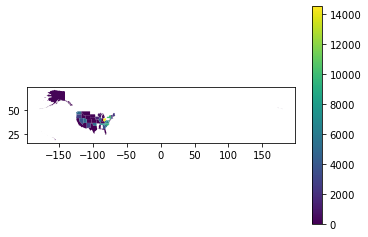

In [45]:
merged.plot(column='Opioid-Deaths-2015', legend=True)

In [46]:
merged.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'State', 'Opioid-Deaths-2015',
       'Opioid-Deaths-2016', 'Opioid-Deaths-2017', 'Opioid-Deaths-2018',
       'Opioid-Deaths-2019', 'Opioid-Deaths-2020', 'Opioid-Deaths-2021'],
      dtype='object')

In [47]:
merged = merged[['STUSPS', 'NAME', 'geometry', 'Opioid-Deaths-2015',
       'Opioid-Deaths-2016', 'Opioid-Deaths-2017', 'Opioid-Deaths-2018',
       'Opioid-Deaths-2019', 'Opioid-Deaths-2020', 'Opioid-Deaths-2021']]

In [48]:
merged.to_file('OpioidsFactors.json', driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
